In [26]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

**шаг 2**

In [3]:
df0 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-bykov/STAT/lesson_2/conversion.csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
df0.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [12]:
df0.xyz_campaign_id.nunique()

3

**шаг 4**

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


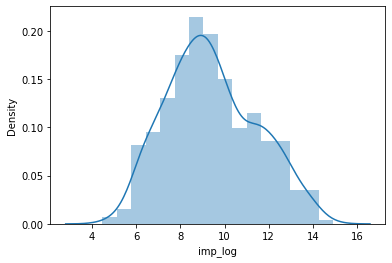

In [19]:
df_fb = df0.groupby(['fb_campaign_id'], as_index=False).agg({'Impressions': 'sum'})
df_fb['imp_log'] = np.log(df0.Impressions)
sns.distplot(df_fb.imp_log)

In [22]:
df_fb.imp_log.mode() # 13 мод => мультимодальное распределение

0     5.023881
1     6.270988
2     6.937314
3     7.149132
4     7.338888
5     7.479864
6     7.638680
7     7.815611
8     7.921173
9     7.965198
10    8.245909
11    8.356790
12    9.323580
dtype: float64

In [31]:
df_fb.imp_log.value_counts().head(15) # другой способ определить моды

8.356790    2
7.921173    2
7.338888    2
7.815611    2
6.937314    2
7.149132    2
6.270988    2
9.323580    2
5.023881    2
8.245909    2
7.965198    2
7.479864    2
7.638680    2
6.309918    1
8.015988    1
Name: imp_log, dtype: int64

**шаг 5**

In [5]:
df0['CTR'] = df0.Clicks/df0.Impressions
df0.sort_values('CTR', ascending=False).head(2)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845


**шаг 6**

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


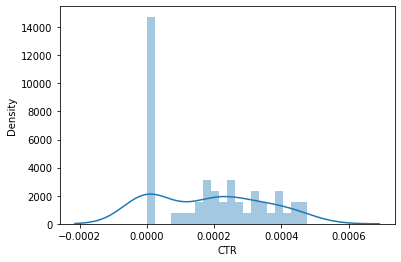

In [18]:
df_916 = df0.query('xyz_campaign_id == 916')
sns.distplot(df_916.CTR, bins=20)

**шаг7**

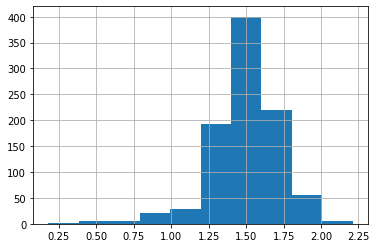

In [24]:
df0['CPC'] = df0.Spent / df0.Clicks
df = df0.dropna()
df.CPC.hist()

In [25]:
df.CPC.quantile(0.75) - df.CPC.quantile(0.25) # межквартильный размах, подсчет "ручками"

0.25436369905

In [27]:
stats.iqr(df.CPC) # межквартильный размах по-взрослому

0.25436369905

**шаг8**

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


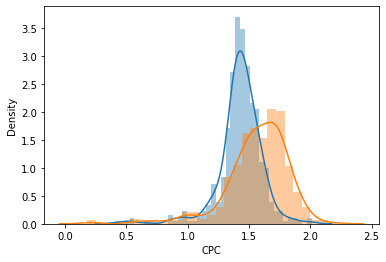

In [29]:
sns.distplot(df.CPC[df.gender == 'F'])
sns.distplot(df.CPC[df.gender == 'M'])

**шаг9**

In [38]:
df0['CR'] = df0.Approved_Conversion / df0.Clicks
df0.CR[df0['ad_id'] == 1121814] * 100

860    3.087886
Name: CR, dtype: float64